In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [25]:
df = pd.read_csv("breast-cancer.csv")

#color for print
GREEN = '\033[92m'
ENDC = '\033[0m'

print(GREEN + "Dataset Info:" + ENDC)
df

Dataset Info:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
print(GREEN + "Dataset Info:" + ENDC)
print(df.info())
#print(GREEN + "\nFirst few rows:" + ENDC)
#print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se

In [27]:
df.shape

(569, 32)

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [29]:
print(GREEN + "number of null values:" + ENDC, df.isnull().sum().sum())

number of null values: 0


We don't have any null values.

# Distribution of Diagnosis

Text(0, 0.5, 'percentage')

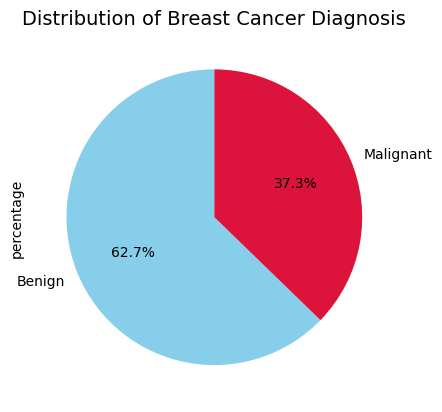

In [30]:
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%',labels=['Benign', 'Malignant'], startangle=90,colors=['skyblue', 'crimson'])
plt.title('Distribution of Breast Cancer Diagnosis', fontsize=14)
plt.ylabel('percentage')

It shows the percentage of benign (0) and malignant (1) cases in the dataset.
based on the pie chart, most of our data belongs to benign.

## Feature selection and transformation

In [31]:
df = df.drop(columns=["id"])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})#make it to binary(int)

## Checking for normality

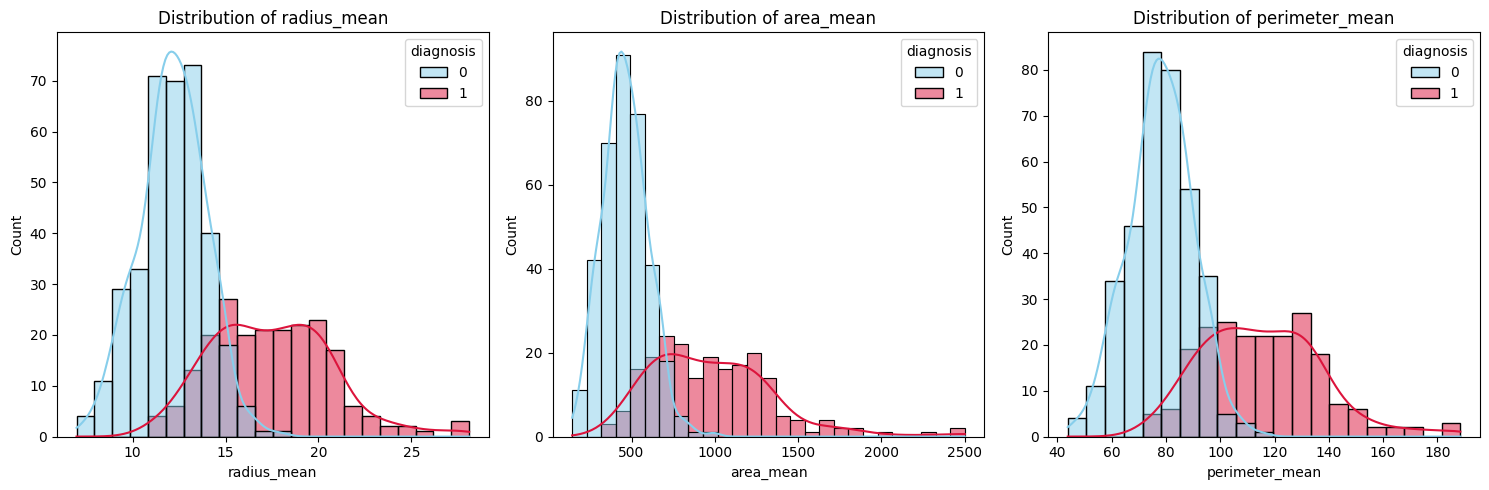

In [32]:
columns_to_plot = ['radius_mean','area_mean','perimeter_mean']

num_cols = len(columns_to_plot) #number of columns for subplots
num_rows = math.ceil(num_cols / 3) #number of rows

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(columns_to_plot, 1):  #iterate over the specified columns
    plt.subplot(num_rows, 3, i)
    sns.histplot(df, x=col, hue='diagnosis', kde=True, palette=['skyblue', 'crimson'])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


the visualization showing the distribution of radius_mean, area_mean, and  perimeter_mean for benign (0) and malignant (1) diagnoses. It highlights how the radius size, area size, and perimeter size differs between the two groups, with benign cases having larger mean amounts.

It also shows that our attributes follow a normal distribution.

## Removing Outliers

In [33]:
from scipy import stats

#apply Z-score method
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return data[(z_scores < threshold).all(axis=1)]

df_cleaned = remove_outliers_zscore(df)

## box plots before and after outliers removal

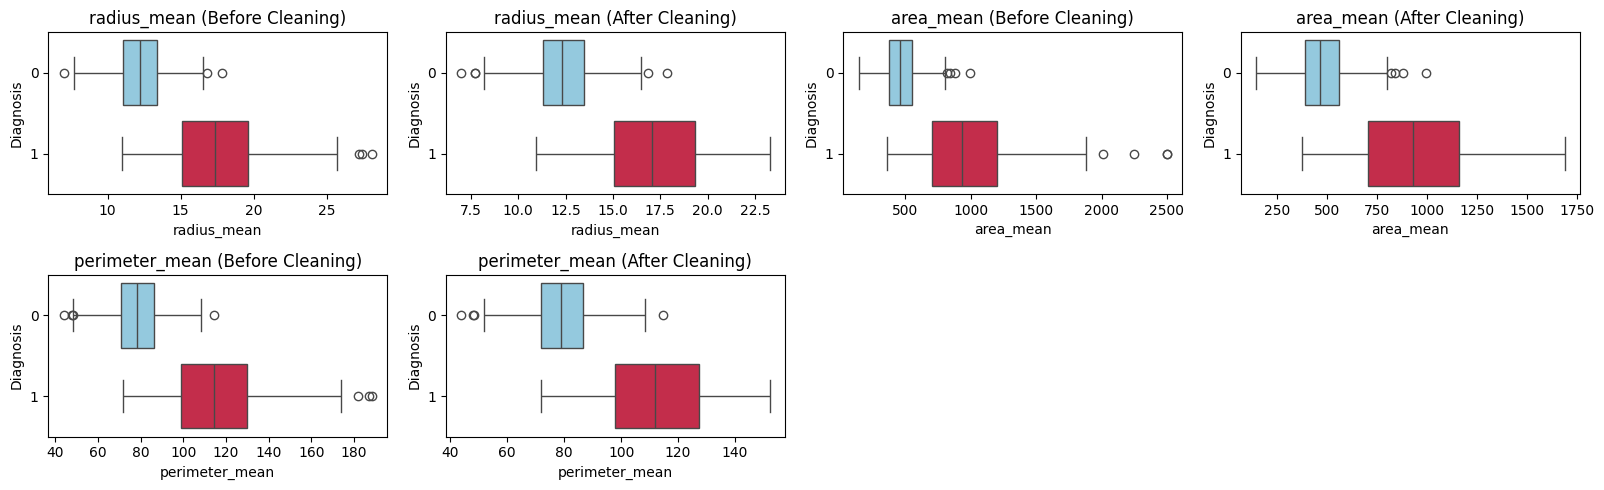

In [34]:
columns_to_plot = ['radius_mean', 'area_mean', 'perimeter_mean']

palette = {0: 'skyblue', 1: 'crimson'}#custom colors for Benign (0) and Malignant (1)

num_cols = len(columns_to_plot)#number of columns to plot
num_rows = math.ceil(num_cols / 2)  #ensuring correct row distribution

plt.figure(figsize=(16, num_rows * 2.5))

for i, column in enumerate(columns_to_plot):
    #before Cleaning
    plt.subplot(num_rows, 4, 2 * i + 1)
    sns.boxplot(x=df[column], y=df['diagnosis'].astype(int), hue=df['diagnosis'].astype(int), palette=palette, orient='h')
    plt.title(f'{column} (Before Cleaning)', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Diagnosis')
    plt.legend([], [], frameon=False)  #remove redundant legend

    #after Cleaning
    plt.subplot(num_rows, 4, 2 * i + 2)
    sns.boxplot(x=df_cleaned[column], y=df_cleaned['diagnosis'].astype(int), hue=df_cleaned['diagnosis'].astype(int), palette=palette, orient='h')
    plt.title(f'{column} (After Cleaning)', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Diagnosis')
    plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


as we can see, outliers got reduced after using z-score oulier removal.

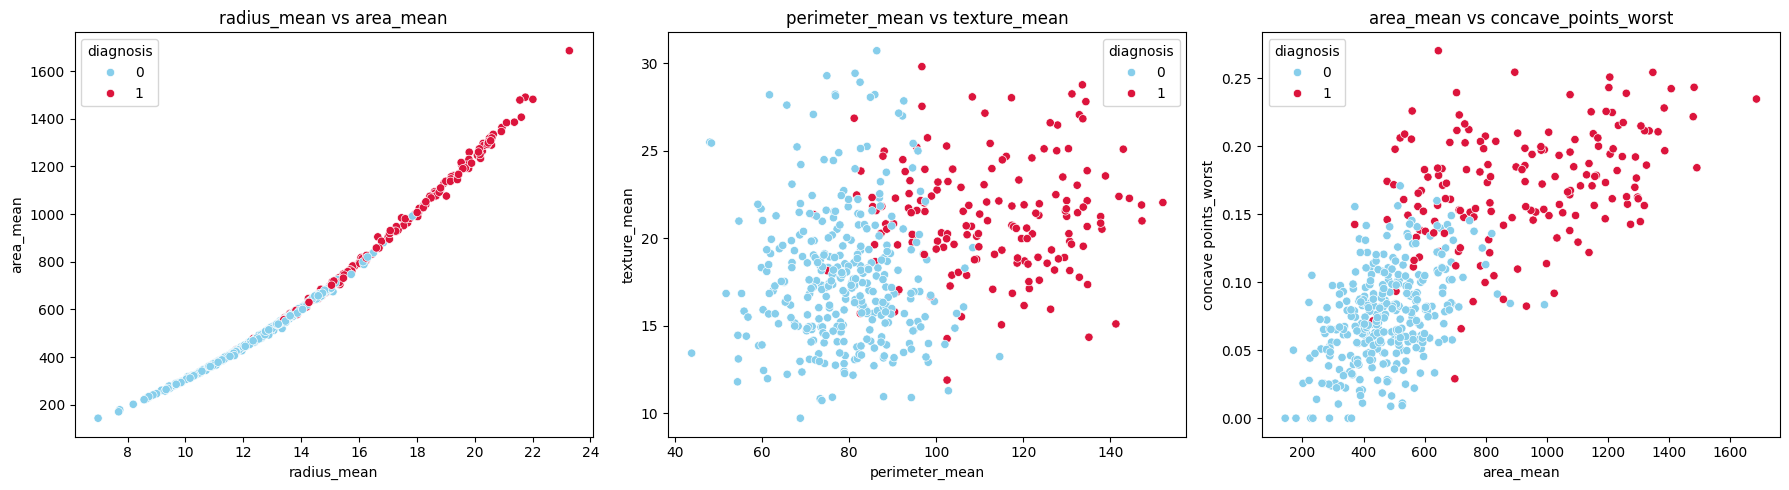

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

#define color palette with numeric keys
palette = {0: 'skyblue', 1: 'crimson'}

#define figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#scatter plot 1: radius_mean vs area_mean
sns.scatterplot(data=df_cleaned, x='radius_mean', y='area_mean', hue='diagnosis', palette=palette, ax=axes[0])
axes[0].set_title('radius_mean vs area_mean')

#scatter plot 2: perimeter_mean vs texture_mean
sns.scatterplot(data=df_cleaned, x='perimeter_mean', y='texture_mean', hue='diagnosis', palette=palette, ax=axes[1])
axes[1].set_title('perimeter_mean vs texture_mean')

#scatter plot 3: area_mean vs concave_points_worst
sns.scatterplot(data=df_cleaned, x='area_mean', y='concave points_worst', hue='diagnosis', palette=palette, ax=axes[2])
axes[2].set_title('area_mean vs concave_points_worst')

plt.tight_layout()
plt.show()


the scatterplots show clear distinctions between benign and malignant diagnosis. Greater tumor dimensions cluster at higher values for size-related variables such as radius_mean, perimeter_mean, and area_mean. According to the trends, these characteristics are essential for differentiating between the two diagnoses classification.

## evaluating correlations between variables(plotting correlation heatmap)

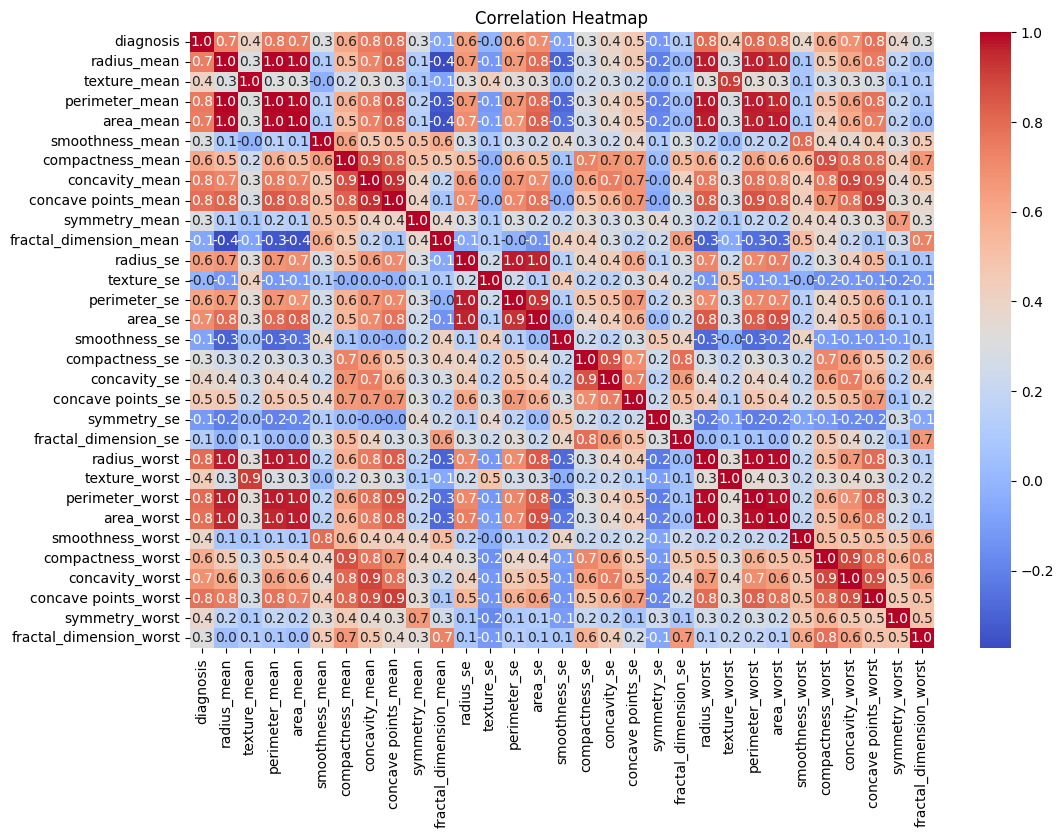

In [36]:
correlation_matrix = df_cleaned.corr()#compute the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
correlation = df_cleaned.corr()['diagnosis'].sort_values(ascending=False)

#get top 5 and least 5 correlations
top_5 = correlation[1:6]  #excluding the first one as it will be 'diagnosis'
least_5 = correlation[-5:]

print(GREEN + "Top 5 correlated features:\n" + ENDC, top_5)
print(GREEN + "\nLeast 5 correlated features:\n" + ENDC, least_5)


Top 5 correlated features:
 perimeter_worst         0.801401
radius_worst            0.795813
concave points_mean     0.790748
area_worst              0.785407
concave points_worst    0.779945
Name: diagnosis, dtype: float64

Least 5 correlated features:
 fractal_dimension_se      0.120884
texture_se               -0.003541
fractal_dimension_mean   -0.066228
smoothness_se            -0.077830
symmetry_se              -0.114229
Name: diagnosis, dtype: float64


as we can see in the heatmap, the least correlated(important) features are: fractal_dimension_se, texture_se, fractal_dimension_mean, smoothness_se, symmetry_se and the most important ones are: concave points_worst,perimeter_worst, concave points_mean, radius_worst, and perimeter_mean

so we will drop the least important ones to increase the performance of the model

# dropping the least correlated features

In [38]:
df = df.drop(columns=["fractal_dimension_se", "texture_se", "fractal_dimension_mean", "smoothness_se", "symmetry_se"])

In [39]:
x = df_cleaned.drop(columns=["diagnosis"])
y = df_cleaned['diagnosis']

# Split data into training and testing sets

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#logistic regression model

Accuracy: 0.933
R-squared: 0.714
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        93
           1       0.91      0.91      0.91        56

    accuracy                           0.93       149
   macro avg       0.93      0.93      0.93       149
weighted avg       0.93      0.93      0.93       149



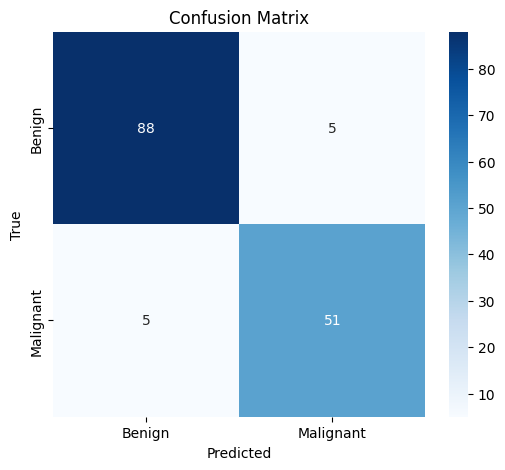

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score

logistic_reg = LogisticRegression(solver='liblinear')
logistic_reg.fit(X_train,y_train)
y_pred_logistic = logistic_reg.predict(X_test)#predict on the test set


#function for calculating accuracy, showing Classification report and confusion matrix heatmap
def evaluate_model(model, X_test, y_test, y_pred):
    accuracy = model.score(X_test, y_test)
    print(GREEN + "Accuracy:" + ENDC + f" {accuracy:.3f}")

    # calculate and print R-squared
    r_squared = r2_score(y_test, y_pred)
    print(GREEN + "R-squared:" + ENDC + f" {r_squared:.3f}")

    print(GREEN + "Classification Report:\n" + ENDC, classification_report(y_test, y_pred))#classification report

    cm = confusion_matrix(y_test, y_pred)#confusion matrix

    #plotting confusion matrix heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


    return accuracy, r_squared

logistic_acc, logistic_R_squared = evaluate_model(logistic_reg, X_test, y_test, y_pred_logistic)

#Support Vector Machine model

Accuracy: 0.919
R-squared: 0.657
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94        93
           1       0.98      0.80      0.88        56

    accuracy                           0.92       149
   macro avg       0.94      0.90      0.91       149
weighted avg       0.93      0.92      0.92       149



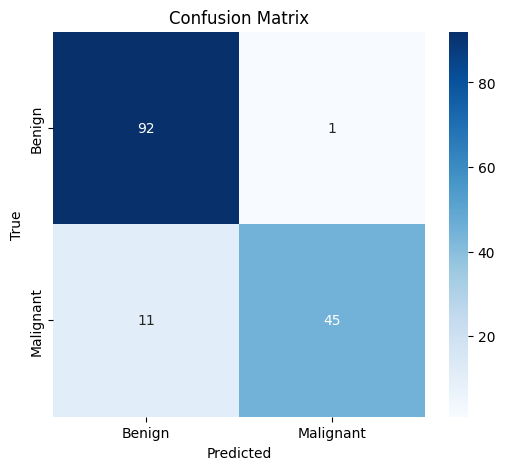

In [42]:
from sklearn.svm import SVC

support_vector_machine = SVC()
support_vector_machine.fit(X_train,y_train)

y_pred_SVC = support_vector_machine.predict(X_test)
SVC_acc, SVC_R_squared = evaluate_model(support_vector_machine, X_test, y_test, y_pred_SVC)

# Gradient Boosting Model

Accuracy: 0.966
R-squared: 0.857
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        93
           1       0.96      0.95      0.95        56

    accuracy                           0.97       149
   macro avg       0.97      0.96      0.96       149
weighted avg       0.97      0.97      0.97       149



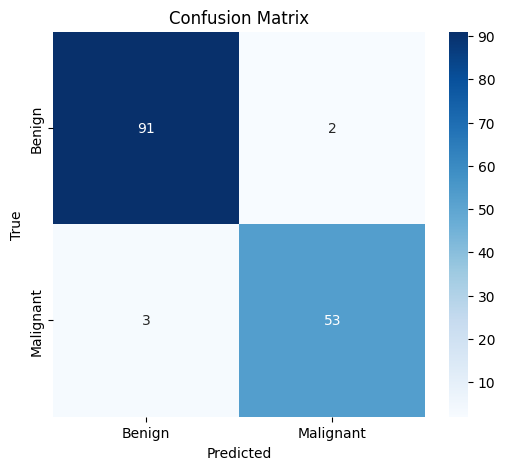

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train,y_train)

y_pred_GBC = gradient_boosting.predict(X_test)
GB_acc, GB_R_squared = evaluate_model(gradient_boosting, X_test, y_test, y_pred_GBC)

# Random Forest Model

Accuracy: 0.960
R-squared: 0.828
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.96      0.93      0.95        56

    accuracy                           0.96       149
   macro avg       0.96      0.95      0.96       149
weighted avg       0.96      0.96      0.96       149



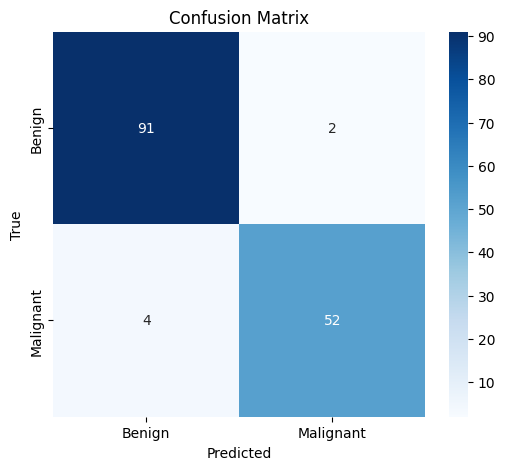

In [45]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_RF = random_forest.predict(X_test)
RF_acc, RF_R_squared = evaluate_model(random_forest, X_test, y_test, y_pred_RF)

# Neural Network

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.3233 - loss: 32.4776 - val_accuracy: 0.6242 - val_loss: 15.5211
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4520 - loss: 13.6739 - val_accuracy: 0.1477 - val_loss: 3.0321
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4152 - loss: 9.9067 - val_accuracy: 0.7248 - val_loss: 1.3449
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5814 - loss: 7.0046 - val_accuracy: 0.7114 - val_loss: 1.4177
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5868 - loss: 6.4579 - val_accuracy: 0.7315 - val_loss: 1.1990
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6268 - loss: 5.1925 - val_accuracy: 0.7181 - val_loss: 1.2478
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6339 - loss: 3.4863 - val_accuracy: 0.9128 - val_loss: 0.3268
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6645 - loss: 4.1182 - val_accuracy: 0.9195 - va

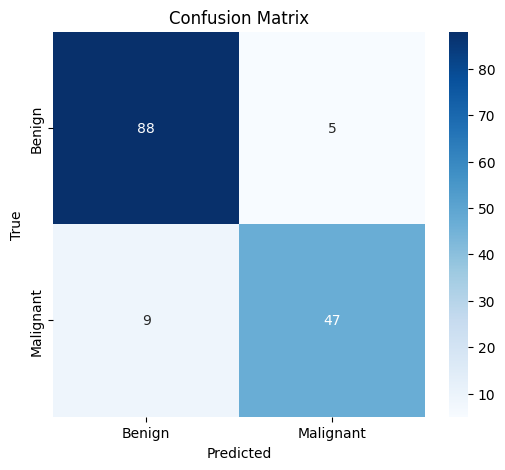

In [46]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#defining the Neural Network model
NN_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  #input Layer
    Dropout(0.2),  #dropout to prevent overfitting
    Dense(16, activation='relu'),  #hidden Layer
    Dense(1, activation='sigmoid')  #output Layer (Sigmoid for binary classification)
])

NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])#compile the model

history = NN_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))#train the model

NN_test_loss, NN_test_acc = NN_model.evaluate(X_test, y_test)#evaluate on test set
print(GREEN + "\nNN Test Accuracy:" + ENDC + f" {NN_test_acc:.3f}")

y_pred_NN = (NN_model.predict(X_test) > 0.5).astype(int)#generate predictions with appling a threshold:If the probability > 0.5, classify as 1 (Malignant), and If the probability ≤ 0.5, classify as 0 (Benign).

# calculate and print R-squared
r_squared = r2_score(y_test, y_pred_NN)
print(GREEN + "R-squared:" + ENDC + f" {r_squared:.3f}")

print(GREEN + "\nClassification Report:\n" + ENDC, classification_report(y_test, y_pred_NN))#print classification report

cm = confusion_matrix(y_test, y_pred_NN)#compute confusion matrix

#plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Accuracies bar plot

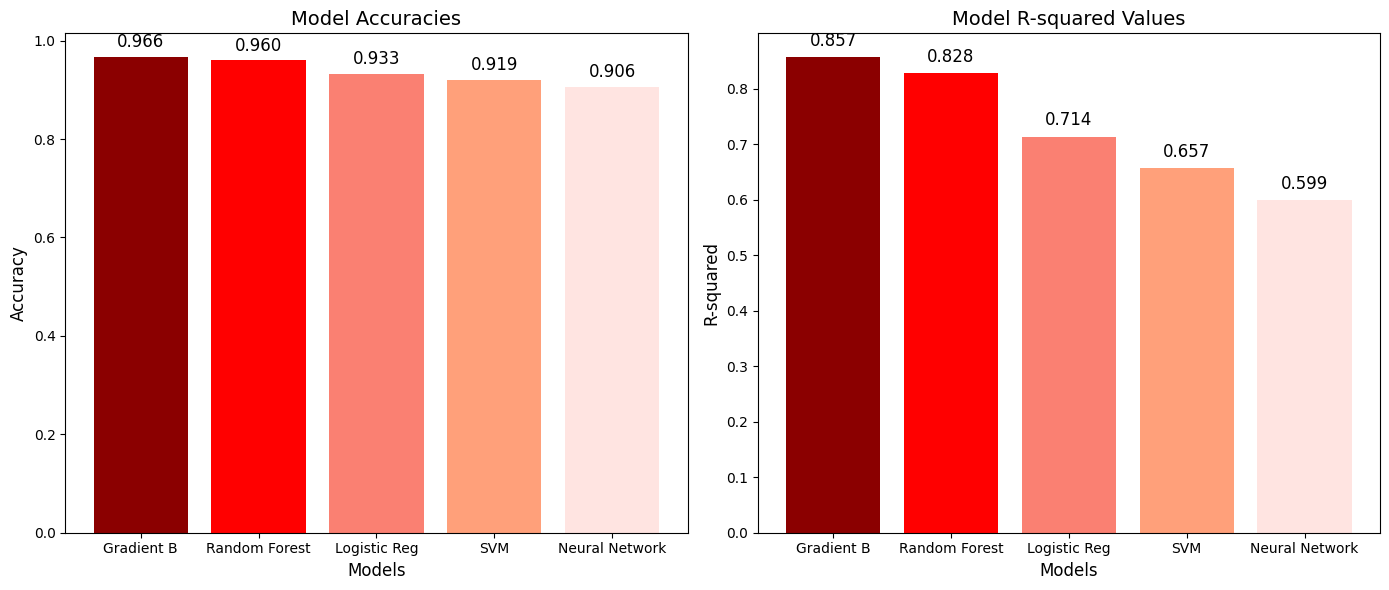

In [48]:

#accuracy values for each model
accuracies = [logistic_acc, SVC_acc, GB_acc, RF_acc, NN_test_acc]
r_squared_values = [logistic_R_squared, SVC_R_squared, GB_R_squared, RF_R_squared, r_squared]
model_names = ['Logistic Reg', 'SVM', 'Gradient B', 'Random Forest', 'Neural Network']

#sortting models by accuracy (descending order)
sorted_indices = np.argsort(accuracies)[::-1]  #sort indices in descending order
sorted_accuracies = np.array(accuracies)[sorted_indices]
sorted_r_squared = np.array(r_squared_values)[sorted_indices]
sorted_model_names = np.array(model_names)[sorted_indices]

#generate colors from dark to light
colors = ['darkred', 'red', 'salmon', 'lightsalmon', 'mistyrose']

# Plotting accuracy and R-squared side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy bar plot
axes[0].bar(sorted_model_names, sorted_accuracies, color=colors)
axes[0].set_title('Model Accuracies', fontsize=14)
axes[0].set_xlabel('Models', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
for i, acc in enumerate(sorted_accuracies):
    axes[0].text(i, acc + 0.02, f'{acc:.3f}', ha='center', fontsize=12)

# R-squared bar plot
axes[1].bar(sorted_model_names, sorted_r_squared, color=colors)
axes[1].set_title('Model R-squared Values', fontsize=14)
axes[1].set_xlabel('Models', fontsize=12)
axes[1].set_ylabel('R-squared', fontsize=12)
for i, r2 in enumerate(sorted_r_squared):
    axes[1].text(i, r2 + 0.02, f'{r2:.3f}', ha='center', fontsize=12)


plt.tight_layout()
plt.show()


as we can see, gradient boosting model has the best accuracy (96.6%), followed by random forest with 96.0% accuracy.

In terms of R Squuared, again Gradient boosting does the best with value of 0.857, and then followed by random forest with value of 0.828.

meaning, roughly 85.7% of the variability in outcome is explained by the model's features which is a really good value.

but this value is smaller for neural network model because it likely requires more data or tuning to perform well, while Gradient Boosting is better suited for our dataset and task, and R² may not be the best metric for evaluating classification models trained with cross-entropy.